<center> <h1> <b>BIRDSONGS<b></h1> </center>
<center> <h1>Syllable Tutorial</h1> </center>

# Define Objects

Import package and define matplotlib backend

In [54]:
# the following line enable interact with figures,  
# you can make zoom and save images from a poup matplotlib window
# to select points: qt ipympl tk. To just visualize: notebook
%matplotlib ipympl

import birdsongs as bs
from birdsongs.util import *

Define directories path and show audio files

In [2]:
# root_path   = "path_to_repository\\'
# audios_path = "audios_path\\'
# bird_name   = "Zonotrichia capensis"
#audios_path = "/home/saguileran/audios/Colombia/" # "/home/saguileran/audios/zebra-finch/ebird/"
audios_path = ""#"/home/saguileran/audios/South_America/"

paths  = bs.Paths(results="results")              # root_path, audios_path, bird_name
ploter = bs.Ploter(save=True)   # to save figures save=True 
#paths.AudioFiles(True)#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]#.head()
paths.AudioFiles().head()

File name  \
0  XC53067 - Rufous-collared Sparrow - Zonotrichi...   
1  XC506362 - Rufous-collared Sparrow - Zonotrich...   
2  XC462515 - Rufous-collared Sparrow - Zonotrich...   
3  XC101564 - Rufous-collared Sparrow - Zonotrich...   
4                                         humman.wav   

                      Scientific name              Common name Length  \
0                Zonotrichia capensis  Rufous-collared Sparrow   0:15   
1                Zonotrichia capensis  Rufous-collared Sparrow   0:09   
2                Zonotrichia capensis  Rufous-collared Sparrow   0:59   
3  Zonotrichia capensis costaricensis  Rufous-collared Sparrow   1:03   
4                               human                    human   <NA>   

                    Recordist        Date   Time    Country  \
0              Carlos Ferrari   2/13/2004    ?:?  Argentina   
1  JAYRSON ARAUJO DE OLIVEIRA   10/5/2019   7:55     Brazil   
2        Rosendo Manuel Fraga  10/23/1978  12:00  Argentina   
3                Jeremy Minns   4/11/2012   9:01   Colombia   
4                        <NA>        <NA>   <NA>       <NA>   

                                      Location Elev. (m)  \
0  Cuesta de Los Terneros, San Rafael, Mendoza         ?   
1                                Britnia, Gois       280   
2         Estancia La Candelaria, Buenos Aires        30   
3            Montaa del Oso, Cha, Cundinamarca      3156   
4                                         <NA>      <NA>   

  Type (predef. / other)                                            Remarks  \
0                   song  From Bird Sounds of Southern South America by ...   
1                   song                                               <NA>   
2                   song  Songs a territorial male sparrow in early spri...   
3                   song                       On isolated tree in pasture.   
4                   <NA>                                               <NA>   

   Cat.nr. Unnamed: 13  label  
0     <NA>     XC53067      0  
1     <NA>   XC506362       1  
2     <NA>   XC462515       2  
3     <NA>   XC101564       3  
4     <NA>        <NA>      4

In [3]:
#selected = paths.AudioFiles(False)[(paths.AudioFiles(False)['Country'] == 'Brazil')][['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected = selected[(paths.AudioFiles(False)['State'] != 'Lima')]#[['ML Catalog Number', 'Scientific Name', 'Year', 'Country-State-County', 'Country', 'State', 'Locality', 'Latitude']]
#selected#["State"]#.iloc[0]["ML Catalog Number"]
#print(len(selected))

In [4]:
#paths.AudioFiles().loc[paths.AudioFiles()['Country'] == 'Argentina']

Define, visualize and hear birdsong. The same funcion allow to us select the time of interest enabling SelectTime_on option

In [55]:
birdsong = bs.BirdSong(paths, file_id="XC53067", dict=["Col", "DC"],
                       Nt=5000, NN=512, flim=(1e3,20e3), #tlim=(0.,7), # no_file=0,
                       )
print(birdsong.state, birdsong.country)
ploter.Plot(birdsong, FF_on=False, SelectTime_on=True)
AudioPlay(birdsong)
#birdsong.file_name

DC Col


/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:108: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


In [31]:
#time_interval = np.array([1.1946, 1.7075])
time_interval = Positions(ploter.klicker)[0]
print("Time interval selected: initial time {:.4f} s, final time {:.4f} s".format(time_interval[0], time_interval[1]))

Time interval selected: initial time 0.9388 s, final time 1.1084 s


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:165: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.


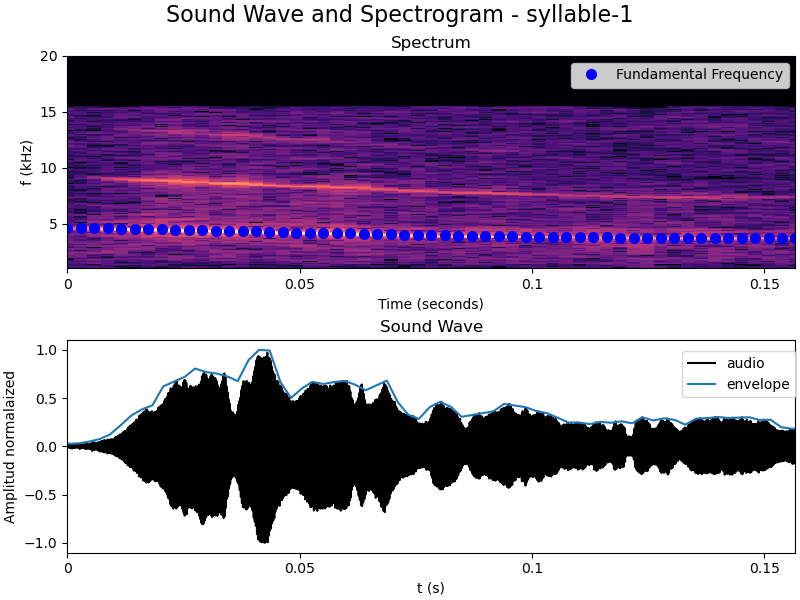

In [32]:
syllable = bs.Syllable(birdsong, tlim=time_interval, flim=birdsong.flim,  NN=birdsong.NN,
                       umbral_FF=1.05, no_syllable=1, type="intro-down")
ploter.Plot(syllable, FF_on=True)
AudioPlay(syllable)

In [9]:
#plt.figure(); plt.plot(syllable.FF, 'o'); plt.show(); plt.ylim((0, 3.5e4));
#syllable.FF

3D plot (in process)

In [10]:
# ploter.Plot3d(birdsong)

In [11]:
# ploter.Plot(birdsong, FF_on=False, syllable=syllable)

Define syllable with the default syllable extractor

In [12]:
# no_syllable    = int(input("Enter the syllable number (1 to {0}): ".format(bird.no_syllables)))
# syllable       = birdsong.Syllable(no_syllable=3)
# ploter.Plot(syllable)
# AudioPlay(syllable)

In [13]:
# ploter.Plot(birdsong, FF_on=False, syllable_on=True, chunck_on=False)

# Optimal Synthetic Syllable

Define optimization method and its parameters 

In [33]:
brute     = {'method':'brute', 'Ns':6}  # , "workers":-1
optimizer = bs.Optimizer(syllable, method_kwargs=brute)
#?lmfit.minimize

Find optimal $\gamma$ for all the syllables computed by the syllables extractor. You can also just find the optimal for the single syllable

In [34]:
# optimal_gamma = optimizer.OptimalGamma(syllable)
optimal_gamma = 37000 # optimizer.AllGammas(birdsong)
syllable.p["gm"].set(value=optimal_gamma)

In [35]:
syllable.p

Parameters([('a0', <Parameter 'a0', value=0.11 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.1 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=0.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

Optimal $\alpha$ and $\beta$

In [36]:
#              [a0, a1, a2, b0, b1, b2]
#syllable.Set([0.154, 0, 0, -0.4, 1, 1.4])
# syllable.p["b2"].set(value=2)

In [37]:
optimizer.OptimalParams(syllable, Ns=6)

As


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **

$a_0*$=0.1060, t=0.7682 min
Bs


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **

$b_0*$=-0.4000,
b_2*=2.0000, t=4.0431 min


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)
/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **

$b_1*$=1.2000, t=0.7510 min
end
Time of execution = 5.5623 minutes


/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Display optimal parameters and generate a synthetic syllable 

In [38]:
Display(syllable.p)
synth_syllable = syllable.Solve(syllable.p)

Parameters([('a0', <Parameter 'a0', value=0.106 (fixed), bounds=[0.01:0.25]>), ('a1', <Parameter 'a1', value=0.0 (fixed), bounds=[-2:2]>), ('a2', <Parameter 'a2', value=0.0 (fixed), bounds=[0:2]>), ('b0', <Parameter 'b0', value=-0.4 (fixed), bounds=[-1:0.5]>), ('b1', <Parameter 'b1', value=1.2000000000000002 (fixed), bounds=[0:2]>), ('b2', <Parameter 'b2', value=2.0 (fixed), bounds=[0:2]>), ('gm', <Parameter 'gm', value=37000 (fixed), bounds=[10000.0:100000.0]>)])

/home/sebas/anaconda3/lib/python3.11/site-packages/librosa-0.10.1-py3.11.egg/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


Visualize and plot the synthetic syllable

In [47]:
ploter.PlotVs(synth_syllable);

/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:69: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:92: UserWarning: The figure layout has changed to tight


/home/sebas/anaconda3/lib/python3.11/site-packages/birdsongs-0.1b0-py3.11.egg/birdsongs/ploter.py:22: UserWarning: The figure layout has changed to tight


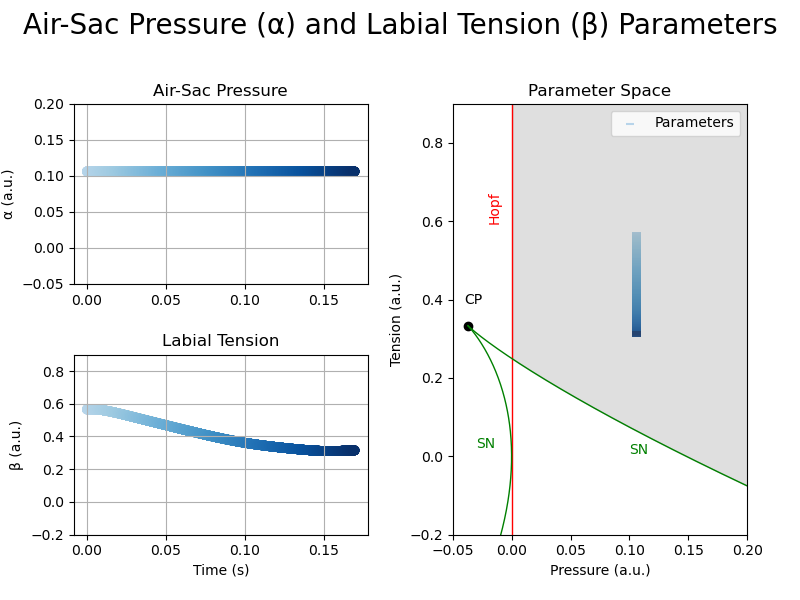

In [48]:
ploter.PlotAlphaBeta(synth_syllable);

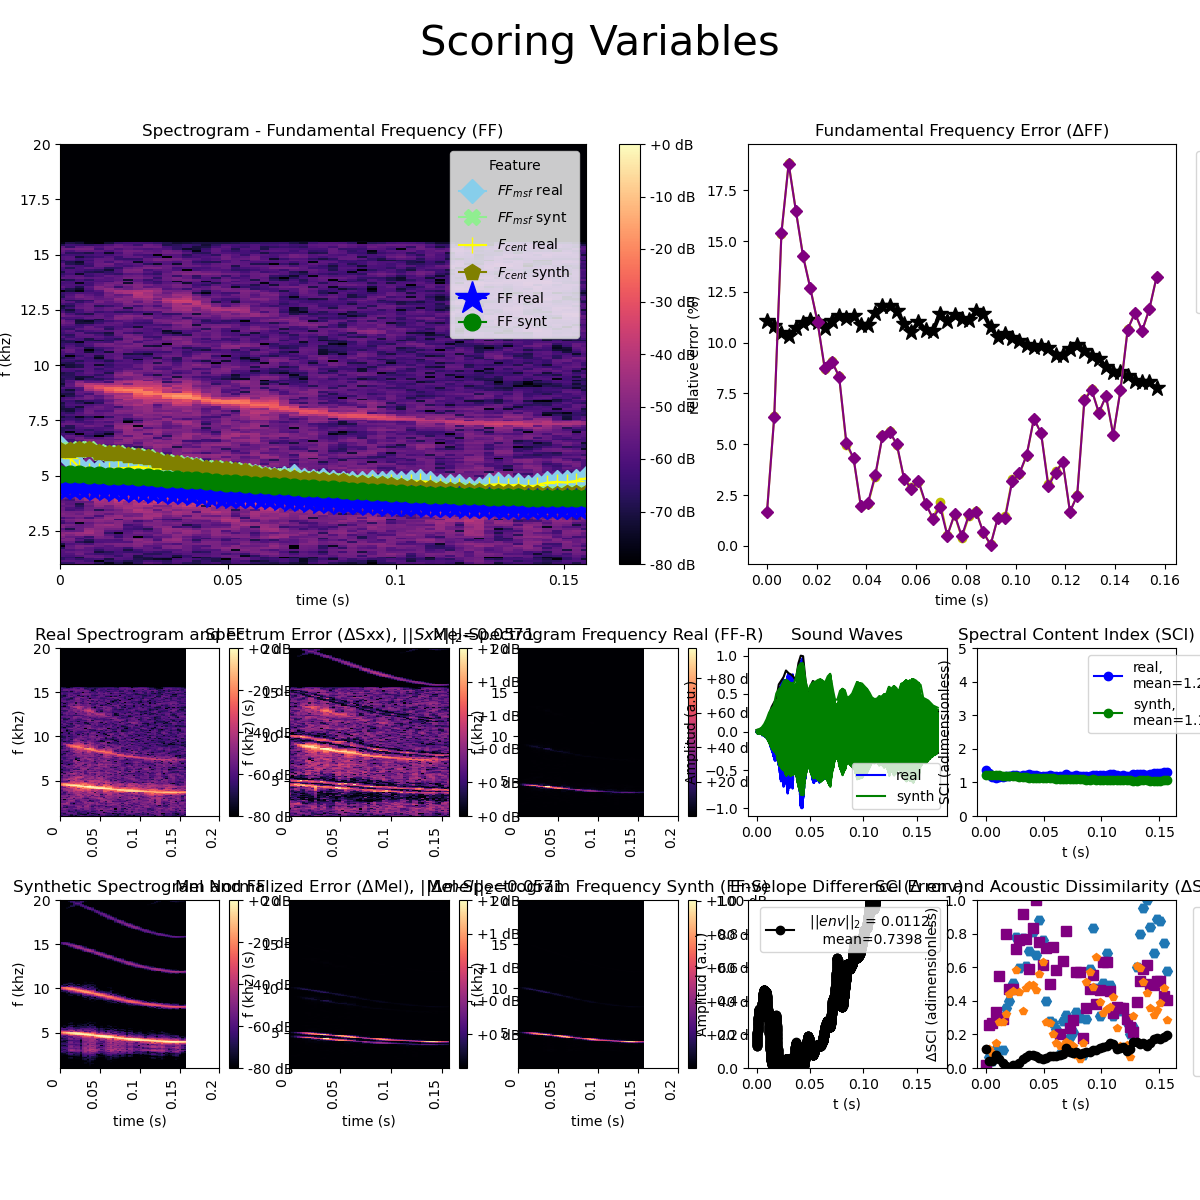

In [49]:
ploter.Result(syllable, synth_syllable, figsize=(12,12));

No such comm: e19969b0ec15447db68c842a0adb5a44


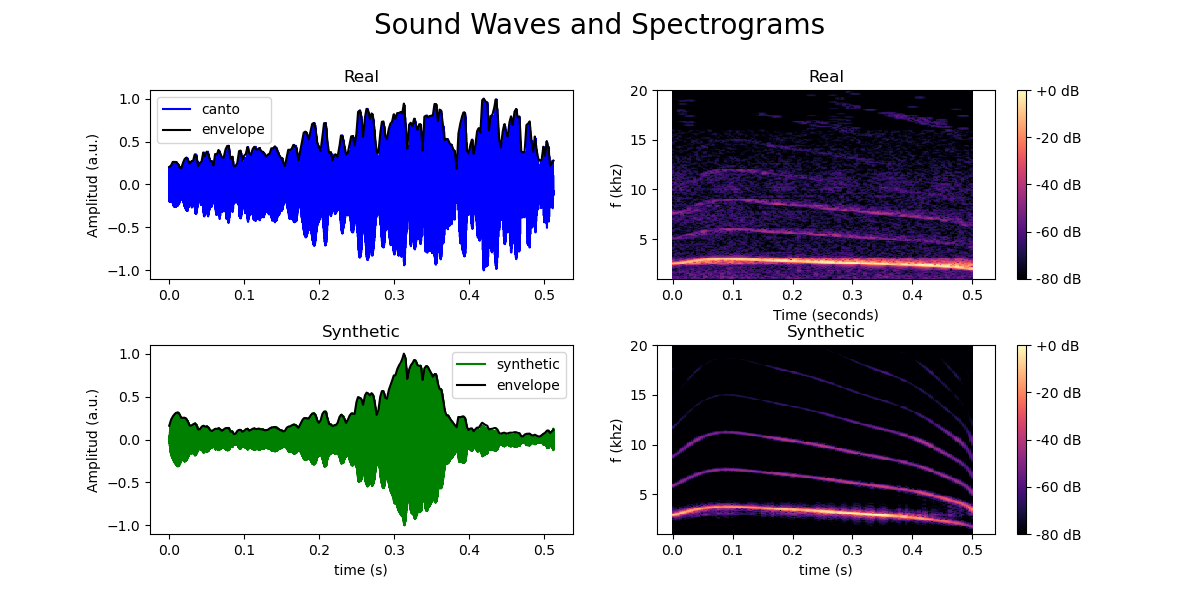

No such comm: d7e8dec55c9f46cd8926b5f8bff5316b


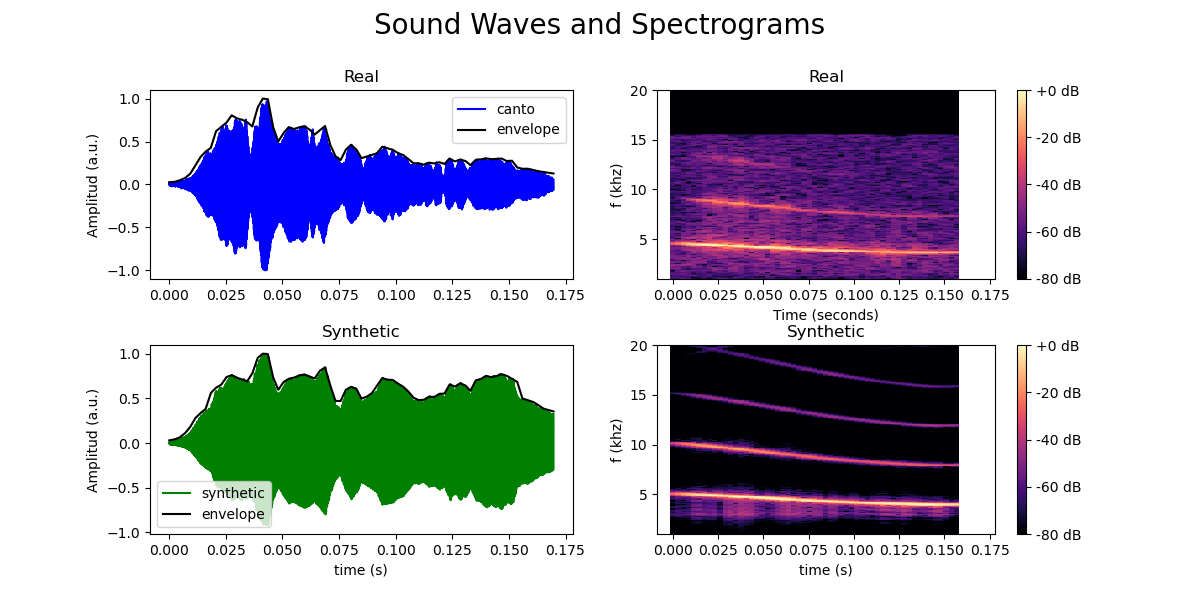

In [42]:
ploter.Syllables(syllable, synth_syllable);

In [50]:
AudioPlay(syllable)

In [51]:
AudioPlay(synth_syllable)

Write synthetic and real syllables

In [52]:
syllable.ExportMotorGestures()
syllable.WriteAudio();  synth_syllable.WriteAudio();

/home/sebas/anaconda3/lib/python3.11/site-packages/scikit_maad-1.4.0-py3.11.egg/maad/sound/input_output.py:402: UserWarning: Values for bit depth should be 8, 16 or 32. Argument ignored.
  warnings.warn('Values for bit depth should be 8, 16 or 32. Argument ignored.')
